
Missing Values in Merged Dataset:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
Population        0
Users             0
dtype: int64


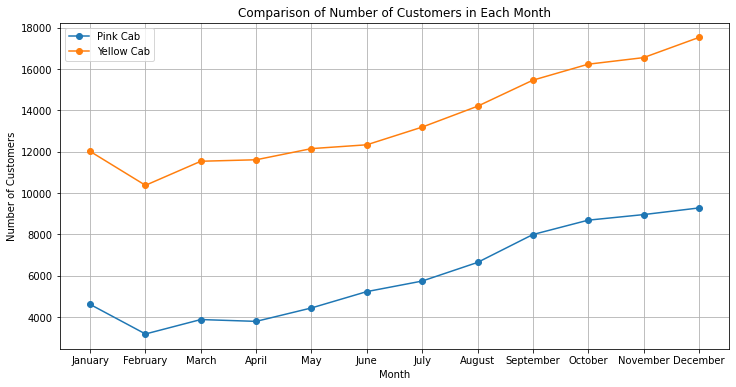

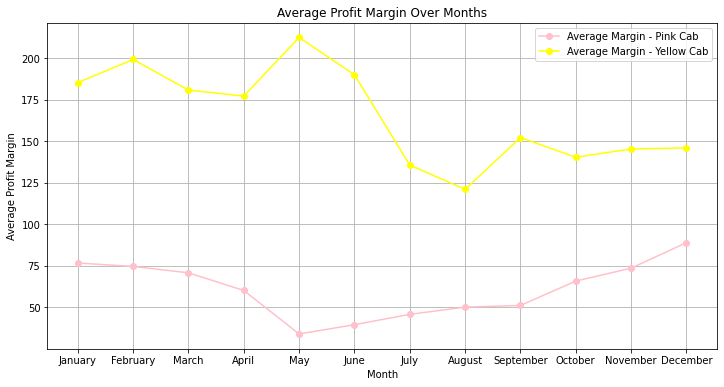

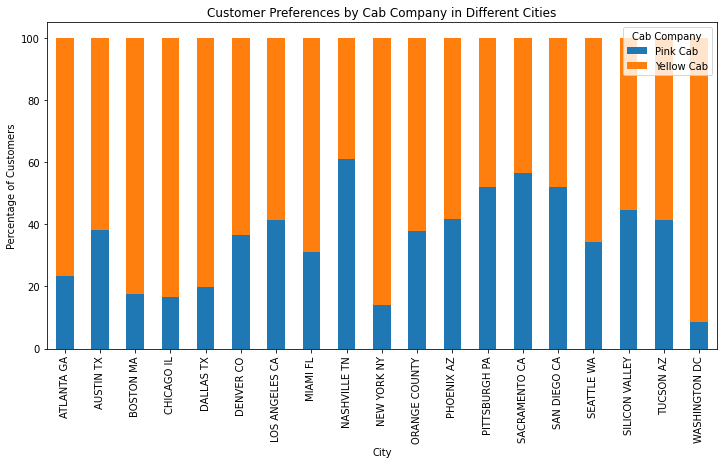

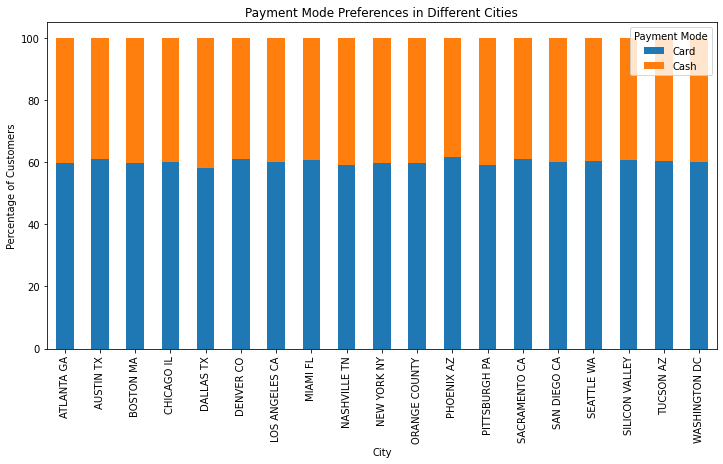

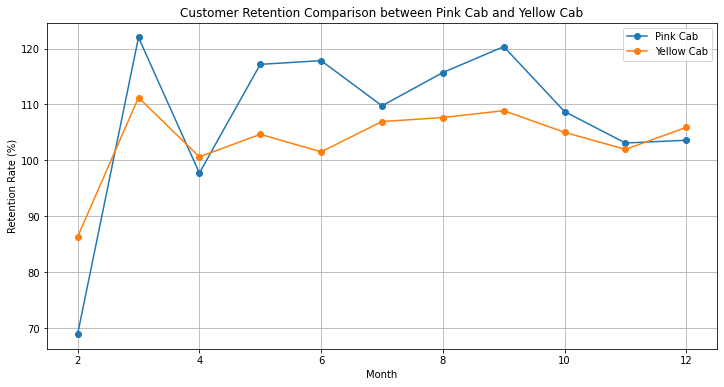

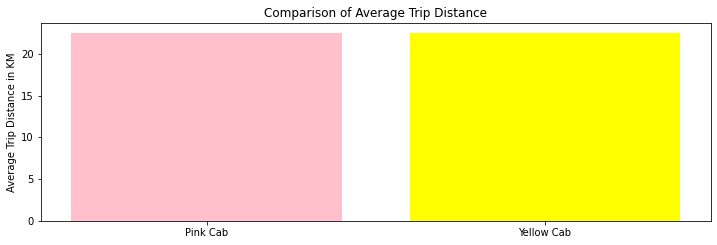

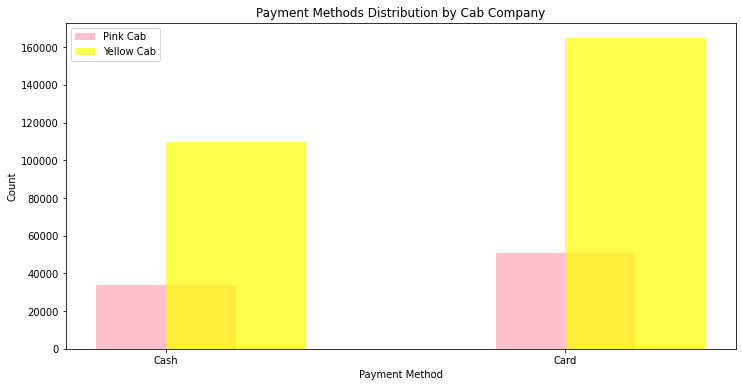

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load datasets
cab_data = pd.read_csv('Cab_Data.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')
city = pd.read_csv('City.csv')

# Remove duplicates from each dataset
cab_data = cab_data.drop_duplicates()
customer_id = customer_id.drop_duplicates()
transaction_id = transaction_id.drop_duplicates()
city = city.drop_duplicates()

# Join cab_data and transaction_id datasets
cab_data = cab_data.merge(transaction_id, on='Transaction ID')

# Join cab_data and city datasets
cab_data = cab_data.merge(city, on='City')

# Display NA value counts
print("\nMissing Values in Merged Dataset:")
print(cab_data.isnull().sum())

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab'].copy()
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab'].copy()

# first hypothesis: "Are there differences in the number of customers for the two companies over the months?"
# Convert timestamp to datetime format for Pink Cab
pink_cab_data['Date of Travel'] = pd.to_datetime(pink_cab_data['Date of Travel'], origin='1899-12-30', unit='D')
pink_cab_data['Month'] = pink_cab_data['Date of Travel'].dt.month
pink_cab_data['Month Name'] = pink_cab_data['Date of Travel'].dt.strftime('%B')

# Convert timestamp to datetime format for Yellow Cab
yellow_cab_data['Date of Travel'] = pd.to_datetime(yellow_cab_data['Date of Travel'], origin='1899-12-30', unit='D')
yellow_cab_data['Month'] = yellow_cab_data['Date of Travel'].dt.month
yellow_cab_data['Month Name'] = yellow_cab_data['Date of Travel'].dt.strftime('%B')

# Ensure 'Month Name' is treated as a categorical variable for Pink Cab
pink_cab_data['Month Name'] = pd.Categorical(pink_cab_data['Month Name'], categories=calendar.month_name[1:], ordered=True)

# Ensure 'Month Name' is treated as a categorical variable for Yellow Cab
yellow_cab_data['Month Name'] = pd.Categorical(yellow_cab_data['Month Name'], categories=calendar.month_name[1:], ordered=True)

# Visualization to compare the peak month with other months for Pink Cab
plt.figure(figsize=(12, 6))
pink_cab_monthly_customer_counts = pink_cab_data.groupby('Month Name')['Customer ID'].nunique()
plt.plot(pink_cab_monthly_customer_counts.index, pink_cab_monthly_customer_counts.values, label='Pink Cab', marker='o')

# Visualization to compare the peak month with other months for Yellow Cab
yellow_cab_monthly_customer_counts = yellow_cab_data.groupby('Month Name')['Customer ID'].nunique()
plt.plot(yellow_cab_monthly_customer_counts.index, yellow_cab_monthly_customer_counts.values, label='Yellow Cab', marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Comparison of Number of Customers in Each Month')
plt.legend()
plt.grid(True)
plt.show()

# Second Hypothesis: Does the average margin (profitability) vary over the months for Pink Cab and Yellow Cab?
# Margin analysis: Calculate margin as the difference between 'Price Charged' and 'Cost of Trip'
pink_cab_data['Margin'] = pink_cab_data['Price Charged'] - pink_cab_data['Cost of Trip']
yellow_cab_data['Margin'] = yellow_cab_data['Price Charged'] - yellow_cab_data['Cost of Trip']

# Group by month and calculate average margin for Pink Cab
pink_cab_monthly_margin = pink_cab_data.groupby('Month Name')['Margin'].mean()

# Group by month and calculate average margin for Yellow Cab
yellow_cab_monthly_margin = yellow_cab_data.groupby('Month Name')['Margin'].mean()

# Visualization of margin over months for Pink Cab
plt.figure(figsize=(12, 6))
plt.plot(pink_cab_monthly_margin.index, pink_cab_monthly_margin.values, label='Average Margin - Pink Cab', marker='o', color='pink')

# Visualization of margin over months for Yellow Cab
plt.plot(yellow_cab_monthly_margin.index, yellow_cab_monthly_margin.values, label='Average Margin - Yellow Cab', marker='o', color='yellow')

plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin Over Months')
plt.legend()
plt.grid(True)
plt.show()

#Third Hypothesis: "Do customer preferences vary significantly across different cities?"
# Group by city and cab company
customer_by_city_and_company = cab_data.groupby(['City', 'Company'])['Customer ID'].count().unstack()

# Calculate the percentage of customers for each cab company in each city
customer_by_city_and_company_percentage = customer_by_city_and_company.div(customer_by_city_and_company.sum(axis=1), axis=0) * 100

# Visualize the distribution
customer_by_city_and_company_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Percentage of Customers')
plt.title('Customer Preferences by Cab Company in Different Cities')
plt.legend(title='Cab Company')
plt.show()

# Group by city and payment mode
payment_mode_by_city = cab_data.groupby(['City', 'Payment_Mode'])['Customer ID'].count().unstack()

# Calculate the percentage of customers using each payment mode in each city
payment_mode_by_city_percentage = payment_mode_by_city.div(payment_mode_by_city.sum(axis=1), axis=0) * 100

# Visualize the distribution
payment_mode_by_city_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Percentage of Customers')
plt.title('Payment Mode Preferences in Different Cities')
plt.legend(title='Payment Mode')
plt.show()

#Fourth hypothesis: "Is there a significant difference in customer retention rates between Pink Cab and Yellow Cab?"
# Define a period for customer retention analysis (e.g., monthly)
retention_period = 'Month'

# Calculate the number of unique customers per period for each company
pink_cab_retention = pink_cab_data.groupby(retention_period)['Customer ID'].nunique()
yellow_cab_retention = yellow_cab_data.groupby(retention_period)['Customer ID'].nunique()

# Calculate the retention rate as a percentage
pink_cab_retention_rate = pink_cab_retention / pink_cab_retention.shift(1) * 100
yellow_cab_retention_rate = yellow_cab_retention / yellow_cab_retention.shift(1) * 100

# Visualize the retention rates over time
plt.figure(figsize=(12, 6))
plt.plot(pink_cab_retention_rate.index, pink_cab_retention_rate.values, label='Pink Cab', marker='o')
plt.plot(yellow_cab_retention_rate.index, yellow_cab_retention_rate.values, label='Yellow Cab', marker='o')
plt.xlabel(retention_period)
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Comparison between Pink Cab and Yellow Cab')
plt.legend()
plt.grid(True)
plt.show()

#Fifth Hypothesis: Does the average trip distance and payment methods used significantly impact the profitability of Pink Cab and Yellow Cab?
# Calculate average trip distance for each cab company
pink_cab_avg_trip_distance = pink_cab_data['KM Travelled'].mean()
yellow_cab_avg_trip_distance = yellow_cab_data['KM Travelled'].mean()

# Explore payment methods distribution for both cab companies
payment_methods_pink_cab = pink_cab_data['Payment_Mode'].value_counts()
payment_methods_yellow_cab = yellow_cab_data['Payment_Mode'].value_counts()

# Get unique payment methods across both companies
all_payment_methods = list(set(payment_methods_pink_cab.index).union(set(payment_methods_yellow_cab.index)))

# Fill missing payment methods with zero count for each company
payment_methods_pink_cab = payment_methods_pink_cab.reindex(all_payment_methods, fill_value=0)
payment_methods_yellow_cab = payment_methods_yellow_cab.reindex(all_payment_methods, fill_value=0)

# Bar plot for average trip distance
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(['Pink Cab', 'Yellow Cab'], [pink_cab_avg_trip_distance, yellow_cab_avg_trip_distance], color=['pink', 'yellow'])
plt.ylabel('Average Trip Distance in KM')
plt.title('Comparison of Average Trip Distance')

# Visualize the payment methods distribution for both cab companies
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(all_payment_methods, payment_methods_pink_cab.values, label='Pink Cab', color='pink', width=bar_width)
plt.bar(all_payment_methods, payment_methods_yellow_cab.values, label='Yellow Cab', color='yellow', width=bar_width, alpha=0.7, align='edge')

plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Methods Distribution by Cab Company')
plt.legend()

plt.show()






